# Szupport vektor gépek

## Radial basis function

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

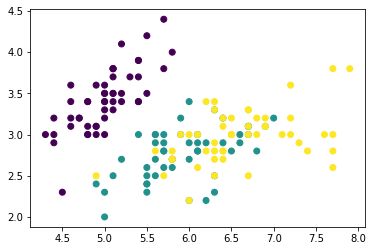

In [2]:
X, y = load_iris(return_X_y=True)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [3]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split

In [4]:
kernel = 1.0 * RBF(1.0)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)
gpc = GaussianProcessClassifier(kernel=kernel,
                                random_state=0).fit(X_train, Y_train)

In [5]:
gpc.score(X_test, Y_test)

0.9736842105263158

In [6]:
gpc

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=0)

In [7]:
import numpy as np

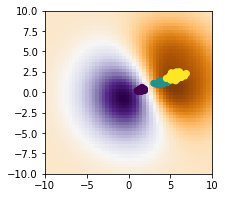

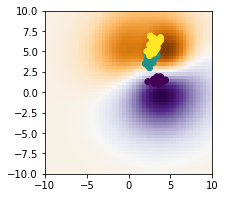

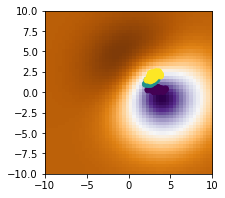

In [8]:
xx, yy = np.meshgrid(np.linspace(-10, 10, 50),
                     np.linspace(-10, 10, 50))
Z = gpc.predict_proba(np.vstack(( 
                                 np.ones(yy.ravel().shape),
                                 np.ones(yy.ravel().shape),
                                 xx.ravel(), yy.ravel()
                                 ),
                                ).T)[:, 1]
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(3,3))
image = plt.imshow(Z, interpolation='nearest',
                       extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                       aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
plt.scatter(X[:, 2], X[:, 3], c=y)
Z = gpc.predict_proba(np.vstack(( 
                                 np.ones(yy.ravel().shape),                                 
                                 xx.ravel(), yy.ravel(),
                                 np.ones(yy.ravel().shape)
                                 ),
                                ).T)[:, 1]
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(3,3))
image = plt.imshow(Z, interpolation='nearest',
                       extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                       aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)

plt.scatter(X[:, 1], X[:, 2], c=y)
Z = gpc.predict_proba(np.vstack(( 
                                 np.ones(yy.ravel().shape),                                 
                                 xx.ravel(),
                                 np.ones(yy.ravel().shape),
                                        yy.ravel()
                                 ),
                                ).T)[:, 1]
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(3,3))
image = plt.imshow(Z, interpolation='nearest',
                       extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                       aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
plt.scatter(X[:, 1], X[:, 3], c=y)

In [ ]:
xx, yy = np.meshgrid(np.linspace(-10, 10, 50),
                     np.linspace(-10, 10, 50))

Kernel 0.001: 0.23684210526315788
Kernel 0.005: 0.23684210526315788
Kernel 0.01: 0.23684210526315788
Kernel 0.05: 0.9736842105263158
Kernel 0.1: 0.9736842105263158
Kernel 0.5: 0.9736842105263158
Kernel 1.0: 0.9736842105263158
Kernel 10.0: 0.9736842105263158
Kernel 50.0: 0.9736842105263158
Kernel 100.0: 0.9736842105263158


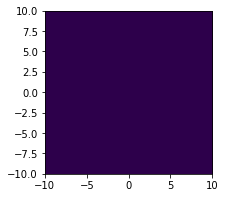

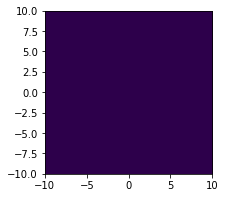

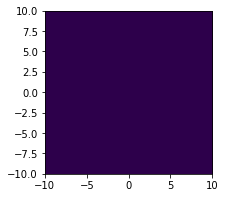

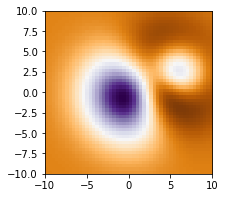

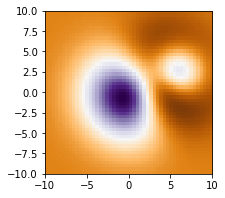

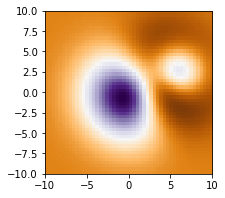

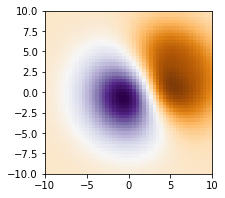

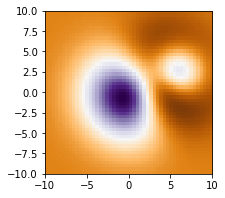

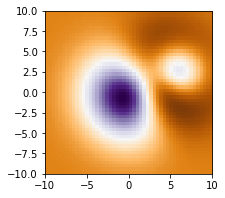

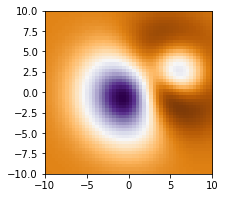

In [10]:
for i in np.array([1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1, 10, 50, 100]):
    kernel = 1.0 * RBF(i)
    gpc = GaussianProcessClassifier(kernel=kernel,
                                    random_state=0).fit(X_train, Y_train)
    print("Kernel {0}: {1}".format(i, gpc.score(X_test, Y_test)))
    Z = gpc.predict_proba(np.vstack(( 
                                 np.ones(yy.ravel().shape),
                                 np.ones(yy.ravel().shape),
                                 xx.ravel(), yy.ravel()
                                 ),
                                ).T)[:, 1]
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(3,3))
    image = plt.imshow(Z, interpolation='nearest',
                           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                           aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)